## Setup

In [75]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import patches
from IPython.display import SVG, display
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem as Chem
from chemvae import mol_utils as mu

## Load coordinates

In [2]:
print('(0/10) fetching latent space group...')
latent_group = []
df = pd.read_csv('./data/ask1/latent_group.csv')
df.drop(['0'], axis=1, inplace=True)
for i in range(len(df)):
    points = list(map(float, df.loc[i, '1'].strip('[]').split(', ')))
    latent_group.append([points, df.loc[i, '2']])

print('(1/10) fetching latent space tsne points...')
points_latent_tsne = []
df = pd.read_csv('./data/ask1/points_latent_tsne.csv')
for i in range(len(df)):\
    points_latent_tsne.append(list(map(float, [df.loc[i, '0'], df.loc[i, '1']])))

print('(2/10) fetching latent space pca points...')
points_latent_pca = []
df = pd.read_csv('./data/ask1/points_latent_pca.csv')
for i in range(len(df)):
    points_latent_pca.append(list(map(float, [df.loc[i, '0'], df.loc[i, '1']])))

print('(3/10) fetching rdk fingerprint tsne points...')
points_rdk_fp_tsne = []
df = pd.read_csv('./data/ask1/points_rdk_fp_tsne.csv')
for i in range(len(df)):
    points_rdk_fp_tsne.append(list(map(float, [df.loc[i, '0'], df.loc[i, '1']])))
    
print('(4/10) fetching rdk fingerprint pca points...')
points_rdk_fp_pca = []
df = pd.read_csv('./data/ask1/points_rdk_fp_pca.csv')
for i in range(len(df)):
    points_rdk_fp_pca.append(list(map(float, [df.loc[i, '0'], df.loc[i, '1']])))

print('(5/10) fetching pattern fingerprint tsne points...')
points_pattern_fp_tsne = []
df = pd.read_csv('./data/ask1/points_pattern_fp_tsne.csv')
for i in range(len(df)):
    points_pattern_fp_tsne.append(list(map(float, [df.loc[i, '0'], df.loc[i, '1']])))
    
print('(6/10) fetching pattern fingerprint pca points...')
points_pattern_fp_pca = []
df = pd.read_csv('./data/ask1/points_pattern_fp_pca.csv')
for i in range(len(df)):
    points_pattern_fp_pca.append(list(map(float, [df.loc[i, '0'], df.loc[i, '1']])))

print('(7/10) fetching layered fingerprint tsne points...')
points_layered_fp_tsne = []
df = pd.read_csv('./data/ask1/points_layered_fp_tsne.csv')
for i in range(len(df)):
    points_layered_fp_tsne.append(list(map(float, [df.loc[i, '0'], df.loc[i, '1']])))
    
print('(8/10) fetching layered fingerprint pca points...')
points_layered_fp_pca = []
df = pd.read_csv('./data/ask1/points_layered_fp_pca.csv')
for i in range(len(df)):
    points_layered_fp_pca.append(list(map(float, [df.loc[i, '0'], df.loc[i, '1']])))

print('(9/10) fetching MACCSKeys fingerprint tsne points...')
points_MACCSKeys_fp_tsne = []
df = pd.read_csv('./data/ask1/points_MACCSKeys_fp_tsne.csv')
for i in range(len(df)):
    points_MACCSKeys_fp_tsne.append(list(map(float, [df.loc[i, '0'], df.loc[i, '1']])))
    
print('(10/10) fetching MACCSKeys fingerprint pca points...')
points_MACCSKeys_fp_pca = []
df = pd.read_csv('./data/ask1/points_MACCSKeys_fp_pca.csv')
for i in range(len(df)):
    points_MACCSKeys_fp_pca.append(list(map(float, [df.loc[i, '0'], df.loc[i, '1']])))

(0/10) fetching latent space group...
(1/10) fetching latent space tsne points...
(2/10) fetching latent space pca points...
(3/10) fetching rdk fingerprint tsne points...
(4/10) fetching rdk fingerprint pca points...
(5/10) fetching pattern fingerprint tsne points...
(6/10) fetching pattern fingerprint pca points...
(7/10) fetching layered fingerprint tsne points...
(8/10) fetching layered fingerprint pca points...
(9/10) fetching MACCSKeys fingerprint tsne points...
(10/10) fetching MACCSKeys fingerprint pca points...


## Visualize data

In [3]:
x1 = [ point[0] for point in points_latent_pca ]
y1 = [ point[1] for point in points_latent_pca ]

x2 = [ point[0] for point in points_latent_tsne ]
y2 = [ point[1] for point in points_latent_tsne ]

x3 = [ point[0] for point in points_rdk_fp_pca ]
y3 = [ point[1] for point in points_rdk_fp_pca ]

x4 = [ point[0] for point in points_rdk_fp_tsne ]
y4 = [ point[1] for point in points_rdk_fp_tsne ]

x5 = [ point[0] for point in points_pattern_fp_pca ]
y5 = [ point[1] for point in points_pattern_fp_pca ]

x6 = [ point[0] for point in points_pattern_fp_tsne ]
y6 = [ point[1] for point in points_pattern_fp_tsne ]

x7 = [ point[0] for point in points_layered_fp_pca ]
y7 = [ point[1] for point in points_layered_fp_pca ]

x8 = [ point[0] for point in points_layered_fp_tsne ]
y8 = [ point[1] for point in points_layered_fp_tsne ]

x9 = [ point[0] for point in points_MACCSKeys_fp_pca ]
y9 = [ point[1] for point in points_MACCSKeys_fp_pca ]

x10 = [ point[0] for point in points_MACCSKeys_fp_tsne ]
y10 = [ point[1] for point in points_MACCSKeys_fp_tsne ]

target = [ item[1] for item in latent_group ]
count = 0
for t in target:
    count += t

alpha1 = 1.0 
alpha0 = 0.5
size1 = 5
size0 = 5
color1 = '#e84393'
color0 = '#74b9ff'
bg_color = '#ffffff' # '#CAD3C8'
fontsize = 30

cmap = plt.cm.get_cmap('cool', 2)

fig, ax = plt.subplots(5, 2)
fig.set_size_inches((40, 16))
plt.rcParams['axes.facecolor'] = bg_color

plt.subplot(251)
plt.scatter(x1[count:], y1[count:], c=color0, s=size0, alpha=alpha0)
plt.scatter(x1[:count], y1[:count], c=color1, s=size1, alpha=alpha1)
plt.title('latent PCA', fontsize=fontsize)

plt.subplot(256)
plt.scatter(x2[count:], y2[count:], c=color0, s=size0, alpha=alpha0)
plt.scatter(x2[:count], y2[:count], c=color1, s=size1, alpha=alpha1)
plt.title('latent TSNE', fontsize=fontsize)

plt.subplot(252)
plt.scatter(x3[count:], y3[count:], c=color0, s=size0, alpha=alpha0)
plt.scatter(x3[:count], y3[:count], c=color1, s=size1, alpha=alpha1)
plt.title('rdk fingerprint PCA', fontsize=fontsize)

plt.subplot(257)
plt.scatter(x4[count:], y4[count:], c=color0, s=size0, alpha=alpha0)
plt.scatter(x4[:count], y4[:count], c=color1, s=size1, alpha=alpha1)
plt.title('rdk fingerprint TNSE', fontsize=fontsize)

plt.subplot(253)
plt.scatter(x5[count:], y5[count:], c=color0, s=size0, alpha=alpha0)
plt.scatter(x5[:count], y5[:count], c=color1, s=size1, alpha=alpha1)
plt.title('pattern fingerprint PCA', fontsize=fontsize)

plt.subplot(258)
plt.scatter(x6[count:], y6[count:], c=color0, s=size0, alpha=alpha0)
plt.scatter(x6[:count], y6[:count], c=color1, s=size1, alpha=alpha1)
plt.title('pattern fingerprint TNSE', fontsize=fontsize)

plt.subplot(254)
plt.scatter(x7[count:], y7[count:], c=color0, s=size0, alpha=alpha0)
plt.scatter(x7[:count], y7[:count], c=color1, s=size1, alpha=alpha1)
plt.title('layered fingerprint PCA', fontsize=fontsize)

plt.subplot(259)
plt.scatter(x8[count:], y8[count:], c=color0, s=size0, alpha=alpha0)
plt.scatter(x8[:count], y8[:count], c=color1, s=size1, alpha=alpha1)
plt.title('layered fingerprint TNSE', fontsize=fontsize)

plt.subplot(255)
plt.scatter(x9[count:], y9[count:], c=color0, s=size0, alpha=alpha0)
plt.scatter(x9[:count], y9[:count], c=color1, s=size1, alpha=alpha1)
plt.title('MACCSKeys fingerprint PCA', fontsize=fontsize)

plt.subplot(2, 5,10)
plt.scatter(x10[count:], y10[count:], c=color0, s=size0, alpha=alpha0)
plt.scatter(x10[:count], y10[:count], c=color1, s=size1, alpha=alpha1)
plt.title('MACCKeys fingerprint TNSE', fontsize=fontsize)

plt.show()

KeyboardInterrupt: 

## Check extracted-target molecules from latent TSNE

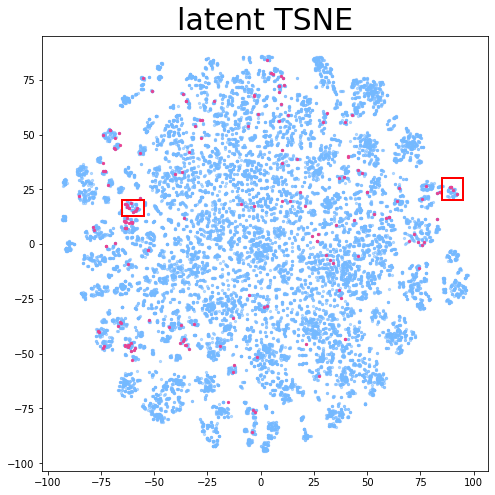

In [96]:
area1 = ((-65, 20), (-55, 13))
area2 = ((85, 30), (95, 20))

x1 = [ point[0] for point in points_latent_tsne ]
y1 = [ point[1] for point in points_latent_tsne ]

alpha1 = 1.0 
alpha0 = 0.5
size1 = 5
size0 = 5
color1 = '#e84393'
color0 = '#74b9ff'
bg_color = '#ffffff' # '#CAD3C8'
fontsize = 30
border_c = 'red'

fig, ax = plt.subplots(1, 1)
fig.set_size_inches((8, 8))
plt.rcParams['axes.facecolor'] = bg_color

rect1 = patches.Rectangle(area1[0], area1[1][0] - area1[0][0], area1[1][1] - area1[0][1], fill=False, color=border_c, linewidth=2)
rect2 = patches.Rectangle(area2[0], area2[1][0] - area2[0][0], area2[1][1] - area2[0][1], fill=False, color=border_c, linewidth=2)
plt.gca().add_patch(rect1)
plt.gca().add_patch(rect2)

plt.scatter(x2[count:], y2[count:], c=color0, s=size0, alpha=alpha0)
plt.scatter(x2[:count], y2[:count], c=color1, s=size1, alpha=alpha1)
plt.title('latent TSNE', fontsize=fontsize)

##### ##### ##### ##### #####

indexes1_extracted_latent_tsne = []
indexes2_extracted_latent_tsne = []
for idx, point in enumerate(points_latent_tsne):
    if point[0] > area1[0][0] and point[0] < area1[1][0] and point[1] > area1[1][1] and point[1] < area1[0][1]:
        indexes1_extracted_latent_tsne.append(idx)
        continue
    if point[0] > area2[0][0] and point[0] < area2[1][0] and point[1] > area2[1][1] and point[1] < area2[0][1]:
        indexes2_extracted_latent_tsne.append(idx)
        continue

## Load SMILES

In [27]:
smiles_group = []
is_count = 0
is_not_count = 0
df = pd.read_csv('./data/ask1/ask1_smiles.csv')
df.drop(['index'], axis=1, inplace=True)
for i in range(len(df)):
    if(df.loc[i, 'smiles'].find('.') == -1 and df.loc[i, 'smiles'].find('i') == -1):
        is_not_count += 1
        smiles_group.append([df.loc[i, 'smiles'], df.loc[i, 'activation']])
    else:
        is_count += 1

print('molcule fetched :', len(df))
print('invalid molecule detected :', is_count)
print('valid molecule detected :', is_not_count)


molcule fetched : 21909
invalid molecule detected : 3155
valid molecule detected : 18754


## Extract coordinates

In [93]:
indexes1_extracted_latent_tsne = []
indexes2_extracted_latent_tsne = []
for idx, point in enumerate(points_latent_tsne):
    if point[0] > area1[0][0] and point[0] < area1[1][0] and point[1] > area1[1][1] and point[1] < area1[0][1]:
        indexes1_extracted_latent_tsne.append(idx)
        continue
    if point[0] > area2[0][0] and point[0] < area2[1][0] and point[1] > area2[1][1] and point[1] < area2[0][1]:
        indexes2_extracted_latent_tsne.append(idx)
        continue

df_area1_a = pd.DataFrame([], columns=['smiles'])
df_area1_d = pd.DataFrame([], columns=['smiles'])
df_area2_a = pd.DataFrame([], columns=['smiles'])
df_area2_d = pd.DataFrame([], columns=['smiles'])
for index in indexes1_extracted_latent_tsne:
    if smiles_group[index][1] == 1:
        df_area1_a = pd.concat((df_area1_a, pd.DataFrame([Chem.MolFromSmiles(smiles_group[index][0])], columns=['smiles'])))
    else:
        df_area1_d = pd.concat((df_area1_d, pd.DataFrame([Chem.MolFromSmiles(smiles_group[index][0])], columns=['smiles'])))
for index in indexes2_extracted_latent_tsne:
    if smiles_group[index][1] == 1:
        df_area2_a = pd.concat((df_area2_a, pd.DataFrame([Chem.MolFromSmiles(smiles_group[index][0])], columns=['smiles'])))
    else:
        df_area2_d = pd.concat((df_area2_d, pd.DataFrame([Chem.MolFromSmiles(smiles_group[index][0])], columns=['smiles'])))

print('# of activated molecule in area1 :', len(df_area1_a))
print('# of deactivated molecule in area1 :', len(df_area1_d))
print('# of activated molecule in area2 :', len(df_area2_a))
print('# of deactivated molecule in area2 :', len(df_area2_d))

# of activated molecule in area1 : 11
# of deactivated molecule in area1 : 59
# of activated molecule in area2 : 5
# of deactivated molecule in area2 : 66


## Display molecules

# of activated molecule in area1 : 11
# of deactivated molecule in area1 : 59
# of activated molecule in area2 : 5
# of deactivated molecule in area2 : 66


<<activated molecule in area1>>


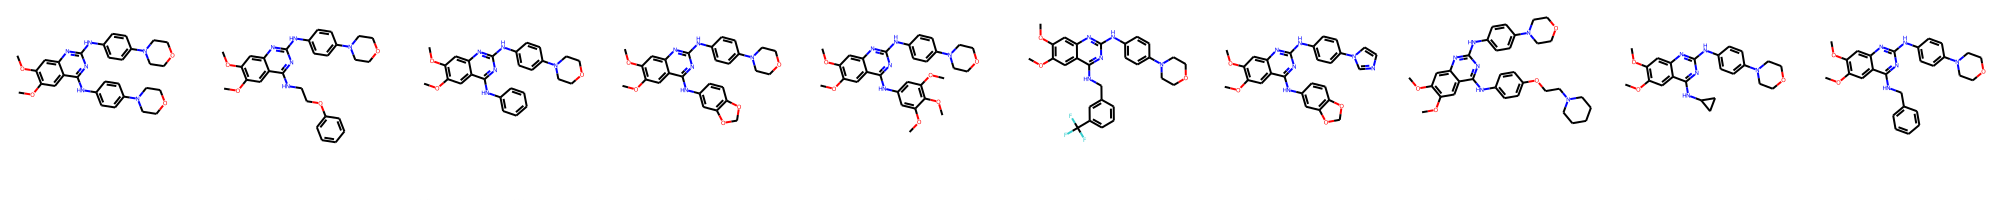

<<deactivated molecule in area1>>


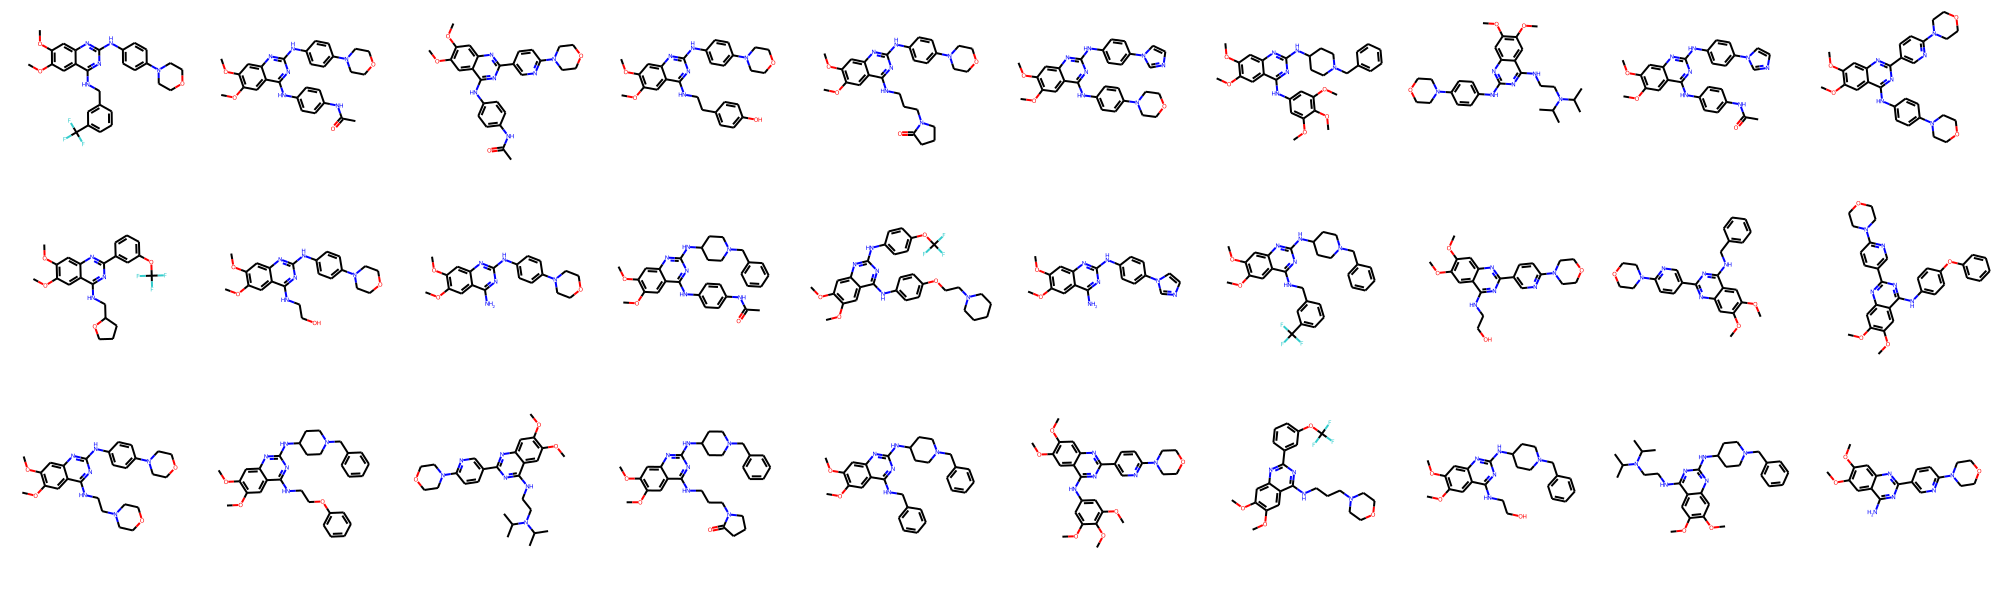

<<activated molecule in area2>>


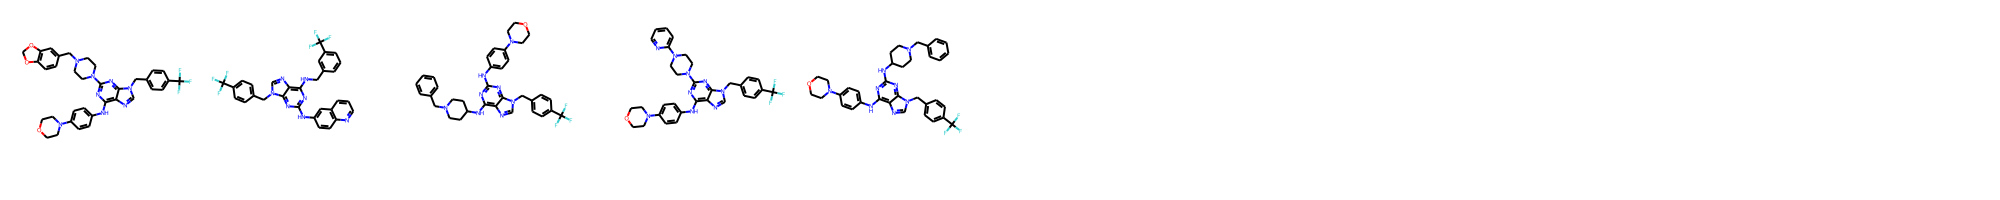

<<deactivated molecule in area2>>


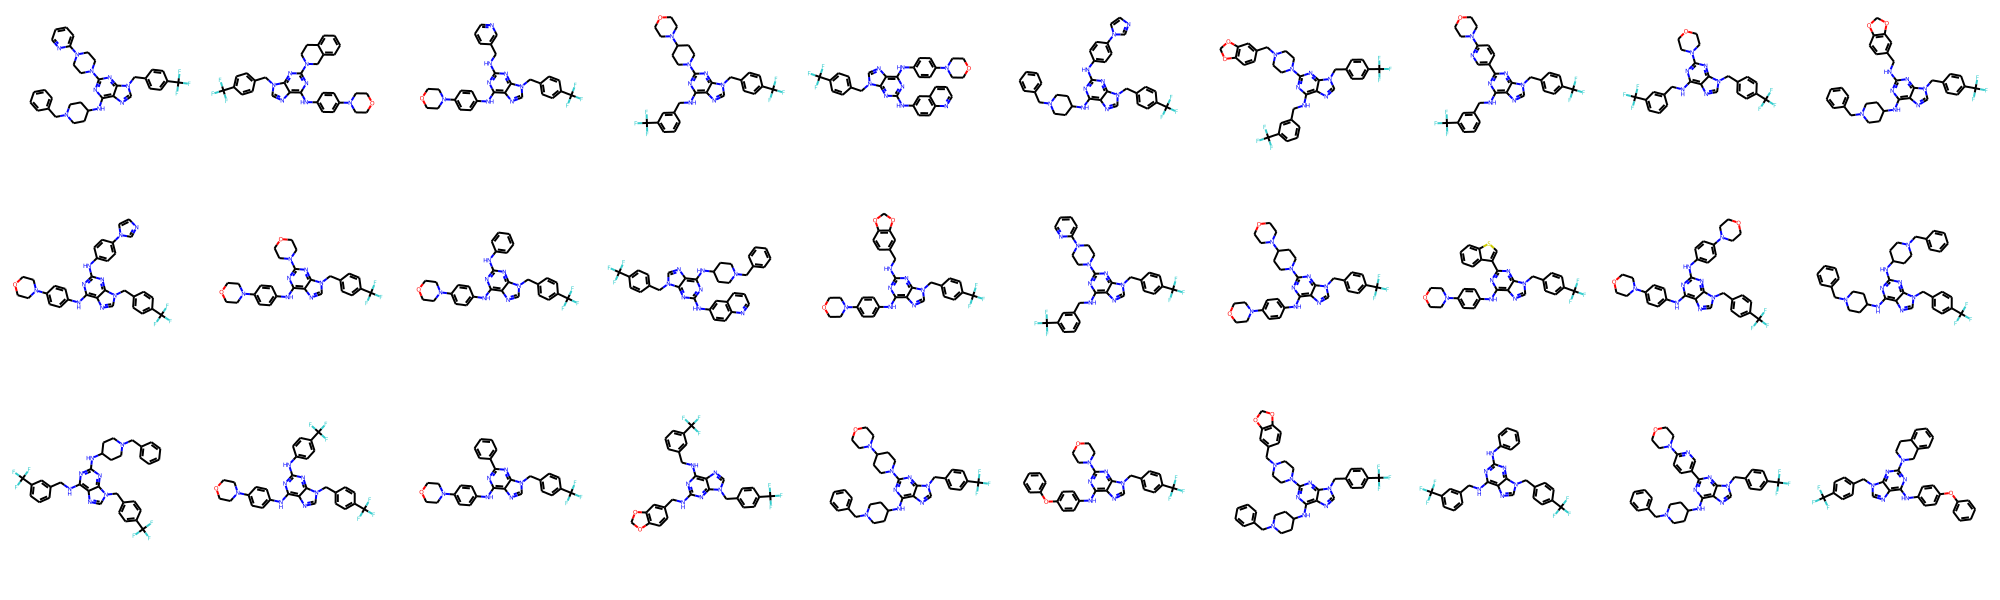

In [95]:
print('# of activated molecule in area1 :', len(df_area1_a))
print('# of deactivated molecule in area1 :', len(df_area1_d))
print('# of activated molecule in area2 :', len(df_area2_a))
print('# of deactivated molecule in area2 :', len(df_area2_d))
print('')
print('')
print('<<activated molecule in area1>>')
display(PandasTools.FrameToGridImage(df_area1_a[:10], column='smiles', legendsCol='smiles', molsPerRow=10))
print('<<deactivated molecule in area1>>')
display(PandasTools.FrameToGridImage(df_area1_d[:30], column='smiles', legendsCol='smiles', molsPerRow=10))
print('<<activated molecule in area2>>')
display(PandasTools.FrameToGridImage
(df_area2_a[:10], column='smiles', legendsCol='smiles', molsPerRow=10))
print('<<deactivated molecule in area2>>')
display(PandasTools.FrameToGridImage(df_area2_d[:30], column='smiles', legendsCol='smiles', molsPerRow=10))